In [4]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


Para o Projeto 1 do meu curso de extração de dados, vamos explorar dados de mercado actualizados sobre futuros de petróleo, gás e outros combustíveis. As características incluem informações sobre o ticker, o tipo de mercadoria, a data de registo, os preços de abertura, alta, baixa e fecho, bem como o volume para essa data. O total de linhas muda todos os dias, uma vez que o conjunto de dados é atualizado diariamente. No entanto, os dados começam em 23/08/2000 e, neste momento, vão até 18/01/2024, o que nos permite ter valores históricos extensos para analisar.

Gostaria de explorar uma questão na minha análise:



In [5]:
# Establish filepath to futures data
my_filepath = "/kaggle/input/fuels-futures-data/all_fuels_data.csv"
# Read the file in using pandas read_csv function
oil_gas_data = pd.read_csv(my_filepath)
# Ensure data was properly read in
oil_gas_data.head()


,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131


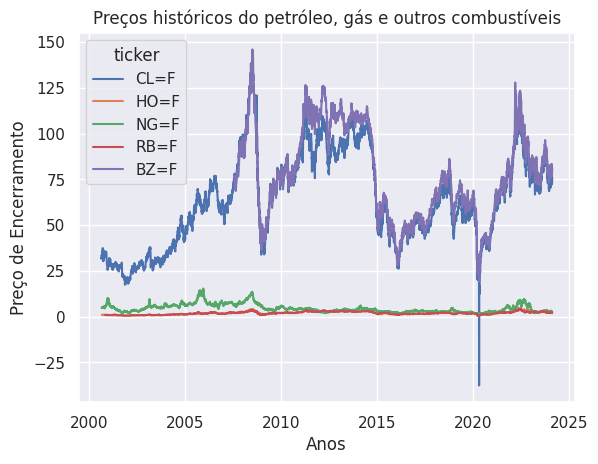

In [ ]:
# Lineplot of entire dataset
sns.set(style="darkgrid")
oil_gas_data['date'] = pd.to_datetime(oil_gas_data['date'])

sns.lineplot(x='date',y='close',hue='ticker',data=oil_gas_data)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Anos')
plt.ylabel('Preço de Encerramento')
plt.title('Preços históricos do petróleo, gás e outros combustíveis')
plt.show()

A nossa pesquisa principal centrar-se-á no petróleo bruto e no gás natural com os códigos CL=F e NG=F, respetivamente. Excluiremos o petróleo bruto Brent, uma vez que não é um índice de referência dos EUA, mas sim um cabaz de vários países fora dos EUA. Dito isto, começaremos a filtrar os nossos dados para destacar essas mercadorias, bem como a reduzir a nossa janela de dados para um intervalo de 5 anos, para ajudar a estabelecer uma imagem mais clara da ação histórica recente dos preços. Depois de estabelecermos os períodos de tempo que gostaríamos de explorar e de filtrarmos as mercadorias não relacionadas com a nossa investigação, podemos começar a explorar os dados para identificar características de sazonalidade e volatilidade histórica para obter informações

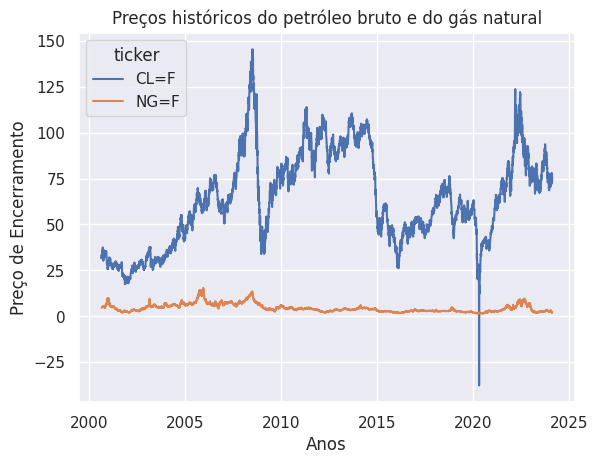

In [ ]:
# List of tickers for filtered dataset
selected_commods = ['CL=F','NG=F']
# Using isin function, create new dataset with only our selected commodities
sub_oil_gas_data = oil_gas_data[oil_gas_data['ticker'].isin(selected_commods)]
#Display head to ensure data is correct
sub_oil_gas_data.tail()
#Plot data
sns.set(style="darkgrid")
sns.lineplot(x='date',y='close',hue='ticker',data=sub_oil_gas_data)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Anos')
plt.ylabel('Preço de Encerramento')

plt.title('Preços históricos do petróleo bruto e do gás natural')
plt.show()

Now that we have selected the commodities relevant to our research we will apply the 5 year window and begin exploring our data for seasonality, recent volatlity and correlation.

In [ ]:
# Establish Start and End Dates
start_date = '2019-01-01'
end_date = '2024-01-01'
# filter our data to only include CL=F and NG=F during the window
Fiveyr_sub_oil_gas_data = sub_oil_gas_data[(sub_oil_gas_data['date'] >= start_date) & (sub_oil_gas_data['date'] <= end_date)]
# Print out head of 5 yr data to ensure the filter was properly applied
Fiveyr_sub_oil_gas_data.head()

,ticker,commodity,date,open,high,low,close,volume
4605,CL=F,Crude Oil,2019-01-02,45.799999,47.779999,44.349998,46.540001,850480
4606,CL=F,Crude Oil,2019-01-03,46.259998,47.490002,45.349998,47.090000,788718
4607,CL=F,Crude Oil,2019-01-04,46.900002,49.220001,46.650002,47.959999,817277
4608,CL=F,Crude Oil,2019-01-07,48.299999,49.790001,48.110001,48.520000,819939
4609,CL=F,Crude Oil,2019-01-08,48.730000,49.950001,48.310001,49.779999,765981


Agora que selecionamos as mercadorias relevantes para a nossa investigação, aplicaremos a janela de 5 anos e começaremos a explorar os nossos dados em termos de sazonalidade, volatilidade recente e correlação.

In [ ]:
# Establish Start and End Dates
start_date = '2023-01-01'
end_date = '2024-01-01'
# filter our data to only include CL=F and NG=F during the window
Oneyr_sub_oil_gas_data = sub_oil_gas_data[(sub_oil_gas_data['date'] >= start_date) & (sub_oil_gas_data['date'] <= end_date)]
# Print out head of 5 yr data to ensure the filter was properly applied
Oneyr_sub_oil_gas_data.head()

,ticker,commodity,date,open,high,low,close,volume
5613,CL=F,Crude Oil,2023-01-03,80.570000,81.500000,76.599998,76.930000,338520
5614,CL=F,Crude Oil,2023-01-04,77.250000,77.419998,72.730003,72.839996,352434
5615,CL=F,Crude Oil,2023-01-05,73.250000,74.919998,72.459999,73.669998,300731
5616,CL=F,Crude Oil,2023-01-06,73.970001,75.470001,73.239998,73.769997,258128
5617,CL=F,Crude Oil,2023-01-09,73.470001,76.739998,73.470001,74.629997,329290


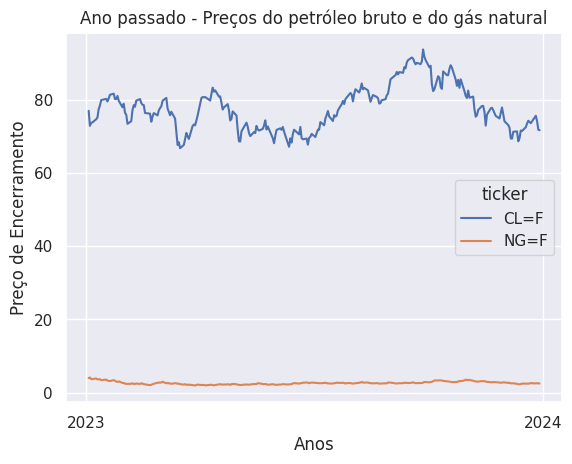

In [ ]:
# Plot of last year data
sns.set(style="darkgrid")
sns.lineplot(x='date',y='close',hue='ticker',data=Oneyr_sub_oil_gas_data)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Anos')
plt.ylabel('Preço de Encerramento')

plt.title('Ano passado - Preços do petróleo bruto e do gás natural')
plt.show()

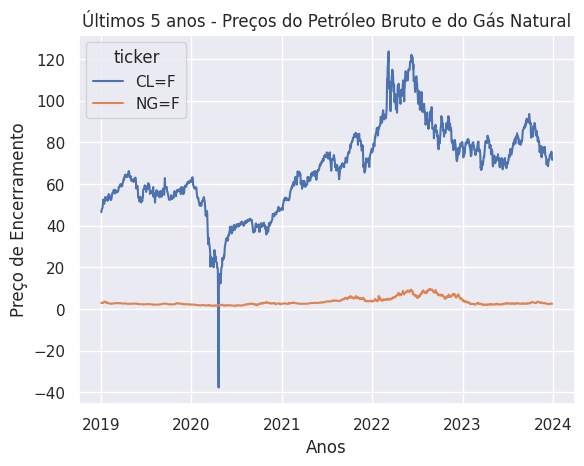

In [ ]:
# Plot of 5 year data
sns.set(style="darkgrid")
sns.lineplot(x='date',y='close',hue='ticker',data=Fiveyr_sub_oil_gas_data)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Anos')
plt.ylabel('Preço de Encerramento')

plt.title('Últimos 5 anos - Preços do Petróleo Bruto e do Gás Natural')
plt.show()


Como podemos ver na visualização acima, é difícil identificar a sazonalidade nos dados, e os movimentos de preços são antes afectados por várias variáveis externas, como a oferta/procura, alterações de produção, conflitos geopolíticos e outros factores macroeconómicos.

No entanto, para obter uma visão mais pormenorizada, podemos importar a biblioteca statsmodel do python para decompor os dados em componentes de tendência, sazonalidade e residuais. Antes de começarmos, filtraremos os dados nos seus próprios conjuntos de dados, um para o petróleo bruto e o outro para o gás natural.

In [ ]:
#Filter data set to just be oil
crude_oil = ['CL=F']
oil_data = Fiveyr_sub_oil_gas_data[Fiveyr_sub_oil_gas_data['ticker'].isin(crude_oil)]
oil_data.tail()

,ticker,commodity,date,open,high,low,close,volume
5859,CL=F,Crude Oil,2023-12-22,73.910004,74.980003,73.389999,73.559998,222600
5860,CL=F,Crude Oil,2023-12-26,73.559998,76.180000,73.129997,75.570000,208715
5861,CL=F,Crude Oil,2023-12-27,75.320000,75.660004,73.769997,74.110001,253323
5862,CL=F,Crude Oil,2023-12-28,73.800003,74.400002,71.720001,71.769997,262748
5863,CL=F,Crude Oil,2023-12-29,71.989998,72.620003,71.250000,71.650002,214486


In [ ]:
# Establish Start and End Dates
start_date = '2023-01-01'
end_date = '2024-01-01'
# filter our data to only include CL=F and NG=F during the window
Oneyr_sub_oil_data = oil_data[(oil_data['date'] >= start_date) & (oil_data['date'] <= end_date)]
# Print out head of 5 yr data to ensure the filter was properly applied
Oneyr_sub_oil_data.head()

,ticker,commodity,date,open,high,low,close,volume
5613,CL=F,Crude Oil,2023-01-03,80.570000,81.500000,76.599998,76.930000,338520
5614,CL=F,Crude Oil,2023-01-04,77.250000,77.419998,72.730003,72.839996,352434
5615,CL=F,Crude Oil,2023-01-05,73.250000,74.919998,72.459999,73.669998,300731
5616,CL=F,Crude Oil,2023-01-06,73.970001,75.470001,73.239998,73.769997,258128
5617,CL=F,Crude Oil,2023-01-09,73.470001,76.739998,73.470001,74.629997,329290


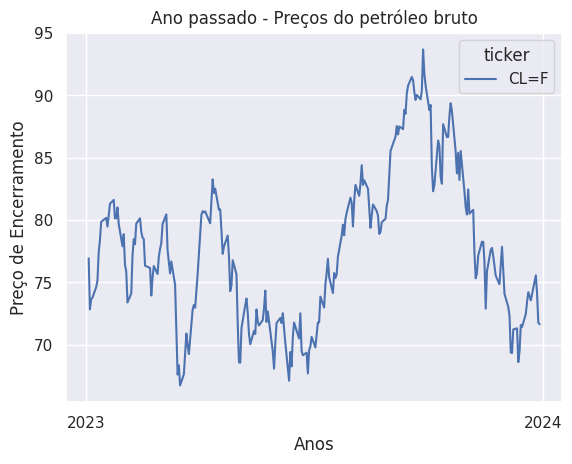

In [ ]:
# Plot of year data - Crude Oil
sns.set(style="darkgrid")
sns.lineplot(x='date',y='close',hue='ticker',data=Oneyr_sub_oil_data)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Anos')
plt.ylabel('Preço de Encerramento')

plt.title('Ano passado - Preços do petróleo bruto')
plt.show()

In [ ]:
# Establish Start and End Dates
start_date = '2019-01-01'
end_date = '2024-01-01'
# filter our data to only include CL=F and NG=F during the window
Fiveyr_sub_oil_data = oil_data[(oil_data['date'] >= start_date) & (oil_data['date'] <= end_date)]
# Print out head of 5 yr data to ensure the filter was properly applied
Fiveyr_sub_oil_data.head()

,ticker,commodity,date,open,high,low,close,volume
4605,CL=F,Crude Oil,2019-01-02,45.799999,47.779999,44.349998,46.540001,850480
4606,CL=F,Crude Oil,2019-01-03,46.259998,47.490002,45.349998,47.090000,788718
4607,CL=F,Crude Oil,2019-01-04,46.900002,49.220001,46.650002,47.959999,817277
4608,CL=F,Crude Oil,2019-01-07,48.299999,49.790001,48.110001,48.520000,819939
4609,CL=F,Crude Oil,2019-01-08,48.730000,49.950001,48.310001,49.779999,765981


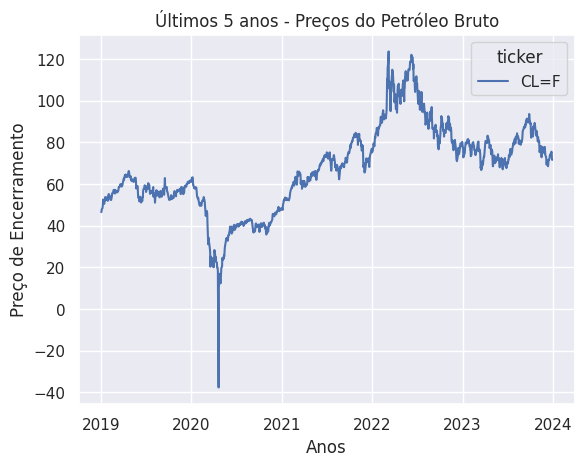

In [ ]:
# Plot of 5 year data - Crude Oil
sns.set(style="darkgrid")
sns.lineplot(x='date',y='close',hue='ticker',data=Fiveyr_sub_oil_data)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Anos')
plt.ylabel('Preço de Encerramento')

plt.title('Últimos 5 anos - Preços do Petróleo Bruto')
plt.show()

Text(0.5, 1.0, 'Observados')

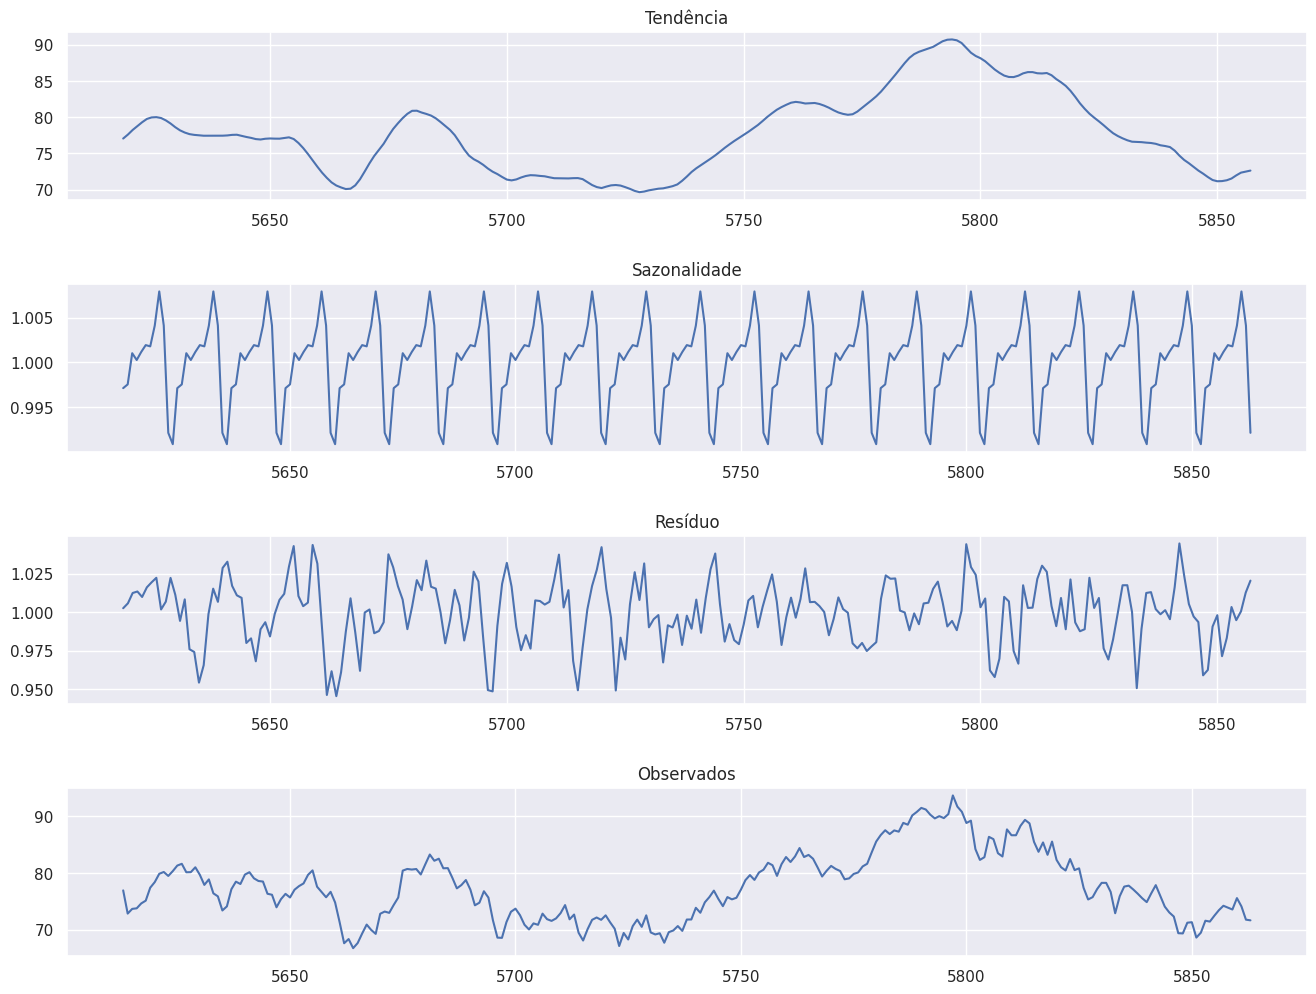

In [ ]:
oil_decompose = seasonal_decompose(Oneyr_sub_oil_data['close'], model='multiplicative',period=12)
# Plot results
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.5)

plt.subplot(4,1,1)
plt.plot(oil_decompose.trend)
plt.title('Tendência')

plt.subplot(4,1,2)
plt.plot(oil_decompose.seasonal)
plt.title('Sazonalidade')

plt.subplot(4,1,3)
plt.plot(oil_decompose.resid)
plt.title('Resíduo')

plt.subplot(4,1,4)
plt.plot(oil_decompose.observed)
plt.title('Observados')


In [ ]:
#Filter data set to just be natural gas
natgas_oil = ['NG=F']
natgas_data = Fiveyr_sub_oil_gas_data[Fiveyr_sub_oil_gas_data['ticker'].isin(natgas_oil)]
natgas_data.tail()

,ticker,commodity,date,open,high,low,close,volume
17632,NG=F,Natural Gas,2023-12-22,2.584,2.620,2.528,2.610,42835
17633,NG=F,Natural Gas,2023-12-26,2.545,2.581,2.454,2.550,50762
17634,NG=F,Natural Gas,2023-12-27,2.580,2.722,2.562,2.619,129265
17635,NG=F,Natural Gas,2023-12-28,2.455,2.576,2.412,2.557,116059
17636,NG=F,Natural Gas,2023-12-29,2.539,2.561,2.489,2.514,89598


In [ ]:
# Establish Start and End Dates
start_date = '2023-01-01'
end_date = '2024-01-01'
# filter our data to only include CL=F and NG=F during the window
Oneyr_sub_gas_data = natgas_data[(natgas_data['date'] >= start_date) & (natgas_data['date'] <= end_date)]
# Print out head of 5 yr data to ensure the filter was properly applied
Oneyr_sub_gas_data.head()

,ticker,commodity,date,open,high,low,close,volume
17386,NG=F,Natural Gas,2023-01-03,4.393,4.394,3.894,3.988,116837
17387,NG=F,Natural Gas,2023-01-04,4.008,4.219,3.900,4.172,99759
17388,NG=F,Natural Gas,2023-01-05,4.155,4.175,3.651,3.720,116682
17389,NG=F,Natural Gas,2023-01-06,3.764,3.839,3.520,3.710,105050
17390,NG=F,Natural Gas,2023-01-09,3.810,4.128,3.781,3.910,130276


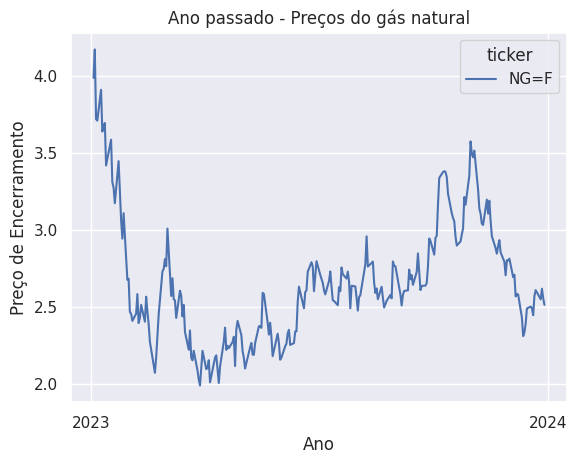

In [ ]:
# Plot of year data - Natgas
sns.set(style="darkgrid")
sns.lineplot(x='date',y='close',hue='ticker',data=Oneyr_sub_gas_data)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Ano')
plt.ylabel('Preço de Encerramento')

plt.title('Ano passado - Preços do gás natural')
plt.show()

In [ ]:
# Establish Start and End Dates
start_date = '2019-01-01'
end_date = '2024-01-01'
# filter our data to only include CL=F and NG=F during the window
Fiveyr_sub_gas_data = natgas_data[(natgas_data['date'] >= start_date) & (natgas_data['date'] <= end_date)]
# Print out head of 5 yr data to ensure the filter was properly applied
Fiveyr_sub_gas_data.head()

,ticker,commodity,date,open,high,low,close,volume
16378,NG=F,Natural Gas,2019-01-02,2.921,3.039,2.905,2.958,147676
16379,NG=F,Natural Gas,2019-01-03,2.963,3.011,2.878,2.945,115803
16380,NG=F,Natural Gas,2019-01-04,2.914,3.049,2.894,3.044,122576
16381,NG=F,Natural Gas,2019-01-07,2.962,2.994,2.910,2.944,109247
16382,NG=F,Natural Gas,2019-01-08,2.950,3.053,2.948,2.967,132229


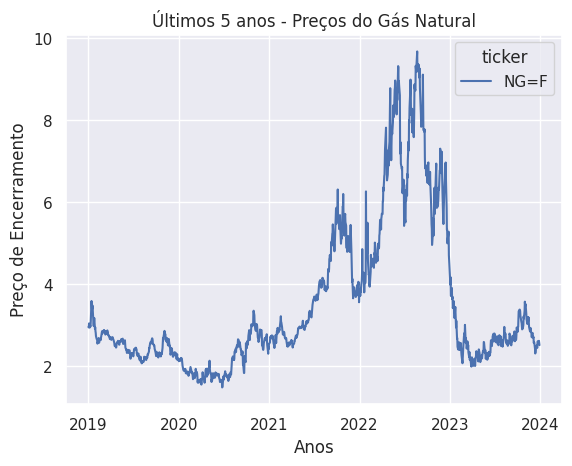

In [ ]:
# Plot of 5 year data - Natural Gas
sns.set(style="darkgrid")
sns.lineplot(x='date',y='close',hue='ticker',data=Fiveyr_sub_gas_data)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Anos')
plt.ylabel('Preço de Encerramento')

plt.title('Últimos 5 anos - Preços do Gás Natural')
plt.show()

Text(0.5, 1.0, 'Observados')

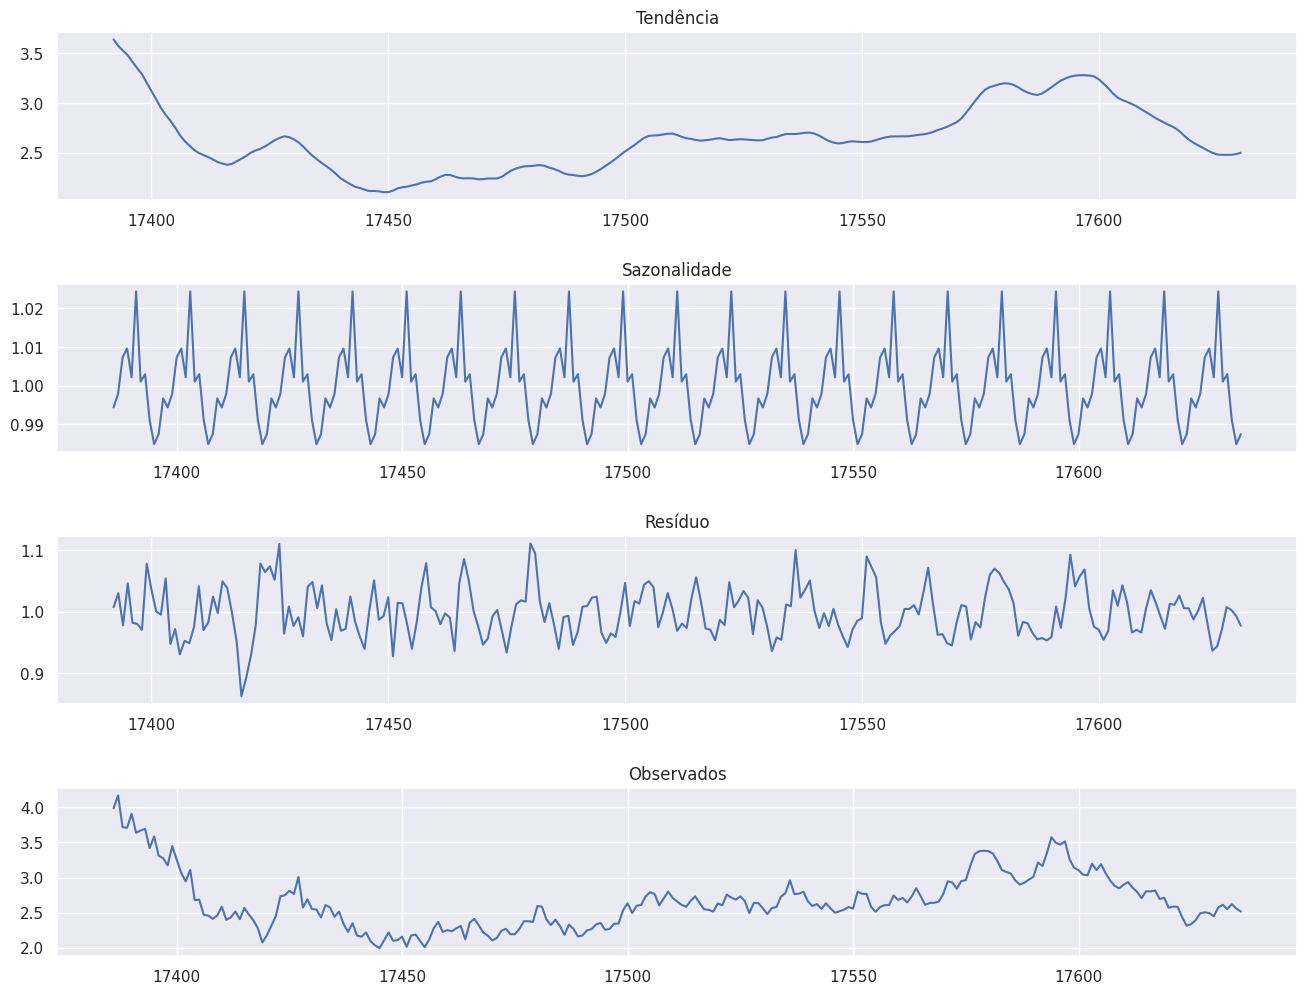

In [ ]:
natgas_decompose = seasonal_decompose(Oneyr_sub_gas_data['close'], model='multiplicative',period=12)
# Plot results
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.5)

plt.subplot(4,1,1)
plt.plot(natgas_decompose.trend)
plt.title('Tendência')

plt.subplot(4,1,2)
plt.plot(natgas_decompose.seasonal)
plt.title('Sazonalidade')

plt.subplot(4,1,3)
plt.plot(natgas_decompose.resid)
plt.title('Resíduo')

plt.subplot(4,1,4)
plt.plot(natgas_decompose.observed)
plt.title('Observados')